In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tomlkit.toml_file import TOMLFile

plt.rcParams['figure.figsize'] = [8, 5.5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

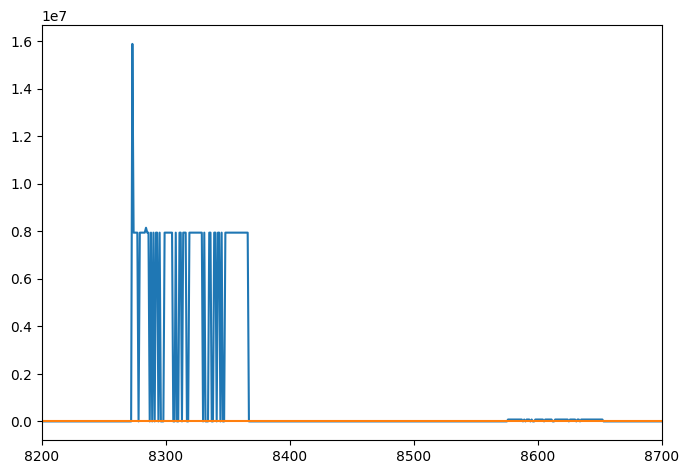

In [2]:
# walshrates = np.genfromtxt("benchmark_data/ism/walsh/singlegrid/test_rates.dat", skip_header=4, max_rows=8764, usecols=-1)
walshrates = []
with open("benchmark_data/ism/walsh/singlegrid/test_rates.dat") as ratefile:
    for line in ratefile.readlines()[4:]:
        # print(line)
        walshrates.append(float(line[80:-1]))

naunetrates = np.loadtxt(f"naunet_cleanism/build/test/reactionrates.txt", dtype="float64")[0]

fig, ax = plt.subplots()

x = np.arange(8764)
ax.plot(x, walshrates);
ax.plot(x, naunetrates);

ax.set_xlim(8200, 8700);

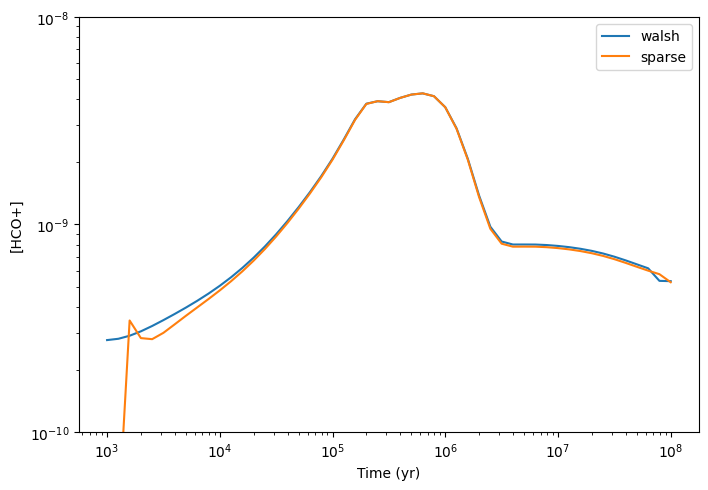

In [3]:
fig, ax = plt.subplots()
spec = "HCO+"

wspecies = np.genfromtxt("benchmark_data/ism/walsh/singlegrid/rate12_complex_atomic.specs", usecols=1, dtype=str)
wdata = np.loadtxt("benchmark_data/ism/walsh/singlegrid/evolution.dat")
time = wdata[:,0]
# ax.scatter(time, wdata[:, np.where(wspecies==spec)[0]+1], label="walsh")
ax.plot(time, wdata[:, np.where(wspecies==spec)[0]+1], label="walsh");

config = TOMLFile(f"naunet_cleanism/naunet_config.toml")
content = config.read()
chemistry = content["chemistry"]
species = chemistry["species"]

bindata = np.loadtxt(f"naunet_cleanism/build/test/evolution_singlegrid.txt", dtype="float64").reshape(-1,len(species)+1)
time = bindata[:,0]
# ax.scatter(time, bindata[:,species.index(spec)+1]/2e4, label="sparse")
ax.plot(time, bindata[:,species.index(spec)+1]/2e4, label="sparse");

# bindata = np.loadtxt(f"naunet_example6/build/test/evolution_singlegrid.txt", dtype="float64").reshape(-1,len(species)+1)
# time = bindata[:,0]
# # ax.scatter(time, bindata[:,species.index(spec)+1]/2e4, label="sparse")
# ax.plot(time, bindata[:,species.index(spec)+1]/2e4, label="sparse");

ax.set_xscale('log');
ax.set_yscale('log');
ax.set_xlabel('Time (yr)');
ax.set_ylabel(f'[{spec}]');
ax.set_ylim(1e-10, 1e-8);
ax.legend();

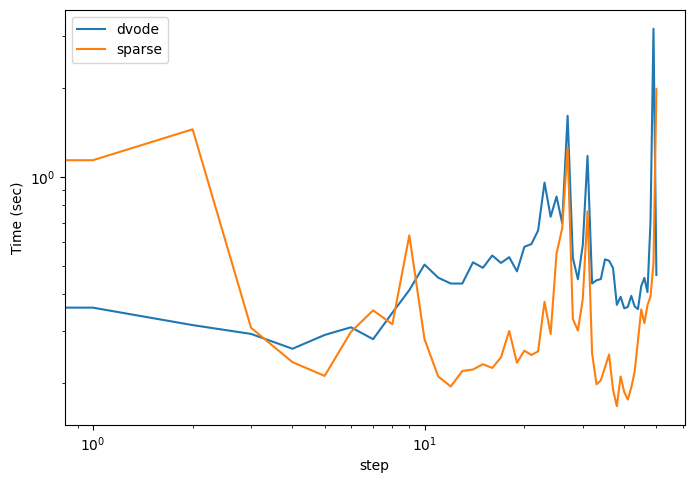

In [4]:
fig, ax = plt.subplots()

timer = np.loadtxt(f"benchmark_data/ism/walsh/singlegrid/time.txt")
steps = range(len(timer))
ax.plot(steps, timer, label='dvode');

timer = np.loadtxt(f"naunet_cleanism/build/test/time_singlegrid.txt")
steps = range(len(timer))
ax.plot(steps, timer, label='sparse');

# timer = np.loadtxt(f"naunet_example6/build/test/time_singlegrid.txt")
# steps = range(len(timer))
# ax.plot(steps, timer, label='cusparse_single');

# timer = np.loadtxt(f"naunet_example6/build/test/time_parallel.txt")
# steps = range(len(timer))
# ax.plot(steps, timer, label='cusparse_parallel');

ax.set_xscale('log');
ax.set_yscale('log');
ax.set_xlabel('step');
ax.set_ylabel('Time (sec)');
ax.legend();